In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysimul
from common import *
from math import *

In [2]:
simul = pysimul.PySimul()
simul['T'] = 1
simul['gamma'] = 100
part_m = 0
#simul['part_m'] = part_m = 0.1
simul['x0sigma'] = σ = 0.3

In [3]:
simul.start()
D = simul['T']/simul['gamma']

In [18]:
simul['n_trajectories']

12681

In [6]:
simul['pause'] = 1

In [5]:
path = "free-x0var/fast-wide-m0"

Survival probability at fixed target position $L$ :

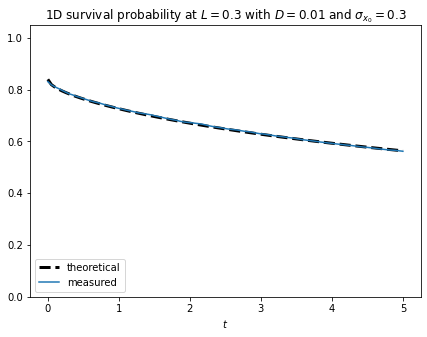

In [12]:
(acc, samples) = simul['survdist_time']
survdist_time = acc/samples*len(acc)
t = np.linspace(0, simul['survdist_max_t'], len(acc))+1e-10

plt.figure(figsize=(7,5))

L_sample = simul['survdist_time_pos']
survdist_th = fpt_free_survival(L_sample, t, D, σ)
#plt.plot(t, survdist_th, label=r"theoretical ($m=0$)", color='black', linestyle='dashed', lw=3)
plt.plot(t, survdist_th, label=r"theoretical", color='black', linestyle='dashed', lw=3)

#plt.plot(t, survdist_time, label=r"measured ($m/\gamma={:.1e}$)".format(simul['part_m']/simul['gamma']))
plt.plot(t, survdist_time, label=r"measured")

plt.xlabel("$t$")
plt.ylim((0,1.05))
plt.title(r"1D survival probability at $L={}$ with $D={}$ and $\sigma_{{x_0}}={}$".format(L_sample,D,σ))
plt.legend(loc='lower left')
plt.savefig(path+"-survival-time.pdf", bbox_inches='tight')

Survival probability at fixed time $t$ :

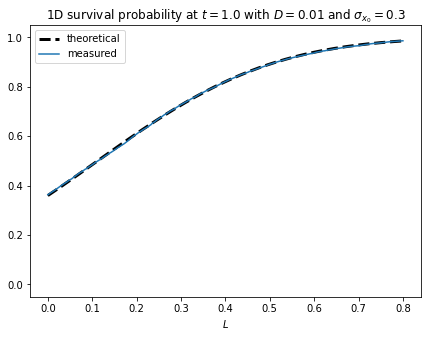

In [16]:
(acc, samples) = simul['survdist_pos']
survdist_pos = acc/samples
L = np.linspace(0, simul['survdist_max_x'], len(acc))

plt.figure(figsize=(7,5))

t_sample = simul['survdist_pos_time']
if σ == 0:
    survdist_th = fpt_free_survival(L, t_sample, D, σ=0)
else:
    distr_x0 = lambda x: distr_x0_harmonic(x, σ)
    surv_f = lambda x: fpt_free_survival(x, t_sample, D, σ=0)
    _,ps = convolve_around_center(distr_x0, surv_f, 5000, len(acc)-1, Δx=simul['survdist_max_x']/len(acc))
    survdist_th = ps[len(acc)-1:]

#plt.plot(L, survdist_th, label=r"theoretical ($m=0$)", color='black', linestyle='dashed', lw=3)
plt.plot(L, survdist_th, label=r"theoretical", color='black', linestyle='dashed', lw=3)

#plt.plot(L, survdist_pos, label=r"measured ($m/\gamma={:.1e}$)".format(simul['part_m']/simul['gamma']))
plt.plot(L, survdist_pos, label=r"measured")

plt.ylim((-0.05, 1.05))
plt.xlabel(r"$L$")
plt.title(r"1D survival probability at $t={}$ with $D={}$ and $\sigma_{{x_0}}={}$".format(t_sample,D,σ))
plt.legend()
plt.savefig(path+"-survival-xtarg.pdf", bbox_inches='tight')

Difference between survival distribution for time and position at the common sampled point :

In [17]:
ix = np.searchsorted(L, L_sample)
it = np.searchsorted(t, t_sample)
print("{:.2f} %".format(100*abs(survdist_pos[ix]-survdist_time[it])/survdist_pos[ix]))

0.14 %


In [ ]:
simul.end()